# Energy balances June 2021 edition

Load, clean and transform the provided `nrg_bal` [TSV file](https://ec.europa.eu/eurostat/web/energy/data/database) (fix mixed tabs and commas as separator, fill missing data, change shape).

Fuel and variable codes are described in the [manual](https://ec.europa.eu/eurostat/documents/38154/4956218/ENERGY-BALANCE-GUIDE-DRAFT-31JANUARY2019.pdf/cf121393-919f-4b84-9059-cdf0f69ec045) or in the [Standard international energy product classification (SIEC)](http://dd.eionet.europa.eu/vocabulary/eurostat/siec/) vocabulary and [Energy balance](http://dd.eionet.europa.eu/vocabulary/eurostat/nrg_bal/) vocabulary.

In [1]:
import numpy as np
import pandas as pd

import prepare

In [2]:
# https://ec.europa.eu/eurostat/web/energy/data/database
url = "https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/nrg_bal_c.tsv.gz"
# The original dataset mixes tabs and commas and randomly contains trailing whitespace in the header and some column's values.
prepare.clean_dataset(url, 'balances-june-2021')

In [3]:
df = pd.read_csv('balances-june-2021.csv', na_values=['z', ':', ':z'])

In [4]:
df.rename(columns={'nrg_bal': 'variable', 'geo\\time': 'country'}, inplace=True)

In [5]:
df.head()

,variable,siec,unit,country,2019,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,AFC,BIOE,GWH,AL,3211.056,3129.617,2804.720,3049.733,2728.383,2547.175,...,3046.944,3192.500,3344.722,3504.167,3671.389,3846.389,4029.722,4221.944,4221.944,4221.944
1,AFC,BIOE,GWH,AT,55053.493,55691.874,58228.039,57876.168,57507.590,55017.991,...,31906.583,27778.728,28863.769,29117.247,27703.651,25186.310,27367.890,27110.141,27905.111,25744.633
2,AFC,BIOE,GWH,BA,13990.576,13379.486,4843.579,5936.294,5937.175,4618.269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFC,BIOE,GWH,BE,25893.302,27909.472,27095.565,27009.755,25268.877,24461.421,...,5226.635,4792.250,4198.739,4464.628,4344.736,3076.269,3139.375,3958.904,4108.185,4034.103
4,AFC,BIOE,GWH,BG,16781.094,16364.406,14661.761,14428.844,13753.572,12695.771,...,4900.556,4759.722,2776.667,2724.166,2394.221,1865.723,1656.454,1818.057,1333.333,2005.833


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240110 entries, 0 to 1240109
Data columns (total 34 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   variable  1240110 non-null  object 
 1   siec      1240110 non-null  object 
 2   unit      1240110 non-null  object 
 3   country   1240110 non-null  object 
 4   2019      684990 non-null   float64
 5   2018      684990 non-null   float64
 6   2017      684990 non-null   float64
 7   2016      684990 non-null   float64
 8   2015      684990 non-null   float64
 9   2014      684990 non-null   float64
 10  2013      669060 non-null   float64
 11  2012      653130 non-null   float64
 12  2011      653130 non-null   float64
 13  2010      653130 non-null   float64
 14  2009      637200 non-null   float64
 15  2008      637200 non-null   float64
 16  2007      637200 non-null   float64
 17  2006      637200 non-null   float64
 18  2005      637200 non-null   float64
 19  2004      621270 non-

In [7]:
# Melt and pivot to have variables as columns and fuel, unit, country and year as multiindex
# Change year type from string to integer
melted = df.melt(id_vars=["variable", "siec", "unit", "country"], var_name="year")
melted = melted.astype({"year": "int64"})
melted.head()

,variable,siec,unit,country,year,value
0,AFC,BIOE,GWH,AL,2019,3211.056
1,AFC,BIOE,GWH,AT,2019,55053.493
2,AFC,BIOE,GWH,BA,2019,13990.576
3,AFC,BIOE,GWH,BE,2019,25893.302
4,AFC,BIOE,GWH,BG,2019,16781.094


In [8]:
melted_reindexed = melted.set_index(keys=["siec", "unit", "country", "year"])

In [9]:
# Pivot and remove unused level from columns axis and unset names
b = melted_reindexed.pivot(columns="variable")
b = b.droplevel(0, axis=1)
b.columns.name = None
b.index.name = None

In [10]:
b.head()

AFC   DL  EXP      FC_E  FC_IND_CON_E  \
siec unit country year                                               
BIOE GWH  AL      1990  4221.944  0.0  0.0  4221.944           0.0   
                  1991  4221.944  0.0  0.0  4221.944           0.0   
                  1992  4221.944  0.0  0.0  4221.944           0.0   
                  1993  4029.722  0.0  0.0  4029.722           0.0   
                  1994  3846.389  0.0  0.0  3846.389           0.0   

                        FC_IND_CPC_E  FC_IND_E  FC_IND_FBT_E  FC_IND_IS_E  \
siec unit country year                                                      
BIOE GWH  AL      1990           0.0       0.0           0.0          0.0   
                  1991           0.0       0.0           0.0          0.0   
                  1992           0.0       0.0           0.0          0.0   
                  1993           0.0       0.0           0.0          0.0   
                  1994           0.0       0.0           0.0          0.0   

                        FC_IND_MAC_E  ...  TO_LBB  TO_NSP  TO_PF  TO_RPI  \
siec unit country year                ...                                  
BIOE GWH  AL      1990           0.0  ...     0.0     0.0    0.0     0.0   
                  1991           0.0  ...     0.0     0.0    0.0     0.0   
                  1992           0.0  ...     0.0     0.0    0.0     0.0   
                  1993           0.0  ...     0.0     0.0    0.0     0.0   
                  1994           0.0  ...     0.0     0.0    0.0     0.0   

                        TO_RPI_BKFLOW  TO_RPI_IT  TO_RPI_PIR  TO_RPI_PPR  \
siec unit country year                                                     
BIOE GWH  AL      1990            0.0        0.0         0.0         0.0   
                  1991            0.0        0.0         0.0         0.0   
                  1992            0.0        0.0         0.0         0.0   
                  1993            0.0        0.0         0.0         0.0   
                  1994            0.0        0.0         0.0         0.0   

                        TO_RPI_PT  TO_RPI_RO  
siec unit country year                        
BIOE GWH  AL      1990        0.0        0.0  
                  1991        0.0        0.0  
                  1992        0.0        0.0  
                  1993        0.0        0.0  
                  1994        0.0        0.0  

[5 rows x 138 columns]

In [11]:
# Export to csv
b.reset_index().to_csv("nrg_bal.csv", index=False)

In [12]:
# Example usage
b.loc[pd.IndexSlice[:, "TJ", "CZ", :], ["PPRD", "EXP", "IMP", "GIC"]]

PPRD      EXP      IMP        GIC
siec  unit country year                                        
BIOE  TJ   CZ      1990  43578.000    0.000    0.000  43578.000
                   1991  43989.000    0.000    0.000  43989.000
                   1992  65044.800    0.000    0.000  65030.000
                   1993  63900.200   79.300   58.589  63894.289
                   1994  61068.400  115.353  165.794  61126.240
...                            ...      ...      ...        ...
W6220 TJ   CZ      2015   2228.000    0.000    0.000   2228.000
                   2016   2387.000    0.000    0.000   2387.000
                   2017   2568.955    0.000    0.000   2568.955
                   2018   2445.865    0.000    0.000   2445.865
                   2019   2550.320    0.000    0.000   2550.320

[2160 rows x 4 columns]

In [13]:
bio_cz_pprd = b.loc[pd.IndexSlice["BIOE", "TJ", "CZ", :], ["PPRD"]]

<AxesSubplot:title={'center':'Primary production of bioenergy in Czechia'}, xlabel='year', ylabel='Terajoules'>

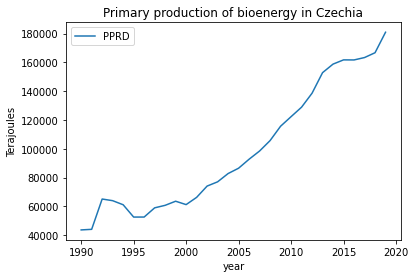

In [14]:
bio_cz_pprd.droplevel([0,1,2]).plot(
    title="Primary production of bioenergy in Czechia",
    ylabel="Terajoules"
    )

In [15]:
bio_cz_exp = b.loc[pd.IndexSlice["BIOE", "TJ", "CZ", :], ["EXP"]]

<AxesSubplot:title={'center':'Exports of bioenergy in Czechia'}, xlabel='year', ylabel='Terajoules'>

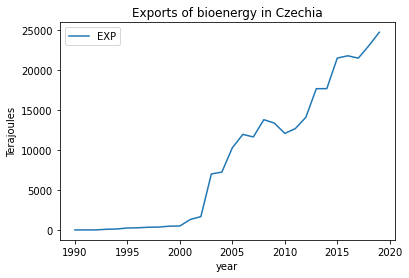

In [16]:
bio_cz_exp.droplevel([0,1,2]).plot(
    title="Exports of bioenergy in Czechia",
    ylabel="Terajoules"
    )

In [17]:
bio_de_pprd = b.loc[pd.IndexSlice["BIOE", "TJ", "DE", :], ["PPRD"]]

<AxesSubplot:title={'center':'Primary production of bioenergy in Germany'}, xlabel='year', ylabel='Terajoules'>

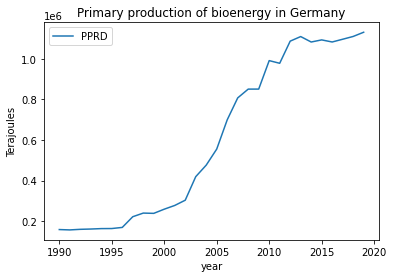

In [18]:
bio_de_pprd.droplevel([0,1,2]).plot(
    title="Primary production of bioenergy in Germany",
    ylabel="Terajoules"
    )

In [19]:
b.loc[pd.IndexSlice[:, :, ["CZ", "DE", "FR", "PL", "SE", "EU27"], :]].reset_index().to_csv("nrg_bal_selected.csv", index=False)